In [5]:
# importing important libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [6]:
baseball = pd.read_csv('baseball.csv')
baseball.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


In [7]:
baseball.tail(3)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


In [8]:
baseball.shape

(30, 17)

In [9]:
baseball.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


In [10]:
baseball.columns

Index(['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E'],
      dtype='object')

In [11]:
# Input features are run,at bats,hits,doubles,triples,honeruns,walks,strikeouts,stolen,bases, 
# run allowed,earned runs,earned run average,shoutouts,saves and error
# Output is number of wins as 'w'
# We have to predict the numbers of wins the team will attain

# Summary Statistics

In [12]:
baseball.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


In [13]:
baseball.W.unique()

array([ 95,  83,  81,  76,  74,  93,  87,  80,  78,  88,  86,  85,  68,
       100,  98,  97,  64,  90,  71,  67,  63,  92,  84,  79], dtype=int64)

In [14]:
baseball.W.value_counts()

68     3
81     2
74     2
76     2
83     2
80     1
97     1
98     1
67     1
71     1
78     1
79     1
95     1
100    1
92     1
84     1
85     1
86     1
87     1
88     1
90     1
63     1
93     1
64     1
Name: W, dtype: int64

# Finding Null Value

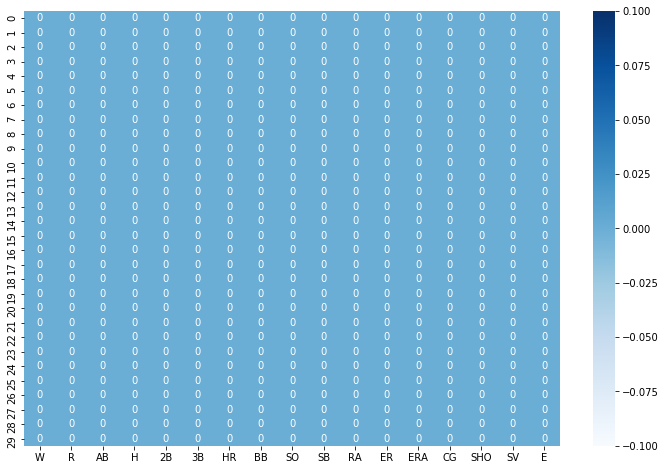

In [15]:
# checking if there are any null value present in the datset using heatmap 

plt.figure(figsize=(12,8))
sns.heatmap(baseball.isnull(),cmap="Blues",annot=True)
plt.show()
# No null value present

In [16]:
# checking the null value without using visualization
baseball.isnull().sum()

# No null value is reflecting in the dataset

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

# Data Visualization

In [17]:
# installing and importing important libraries for graphical representation of data
!pip install plotly==3.10
import plotly.plotly as po
import plotly.figure_factory as ff
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.graph_objs as go

In [18]:
df = baseball
data = df.loc[:,['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']]
data["index"] = np.arange(1, len(data) +1)

figure1 = ff.create_scatterplotmatrix(data, diag ='box', index = 'index', colormap = 'Portland', 
                                      colormap_type ='cat', height = 1000, width = 1000)
iplot(figure1)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000019EA1692308>,
      dtype=object)

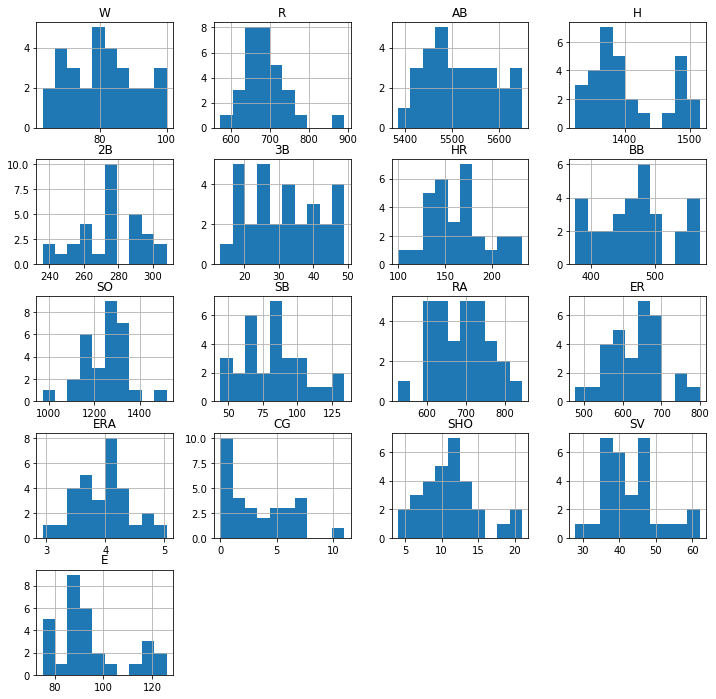

In [19]:
# Representation of dataset in histogram
baseball.hist(figsize=(12,12))

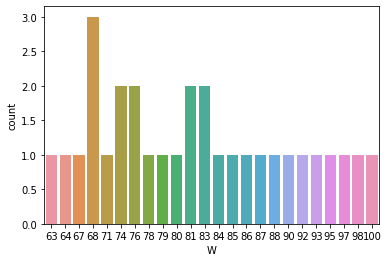

In [20]:
# displaying data on Win
sns.countplot(x ='W', data = baseball)

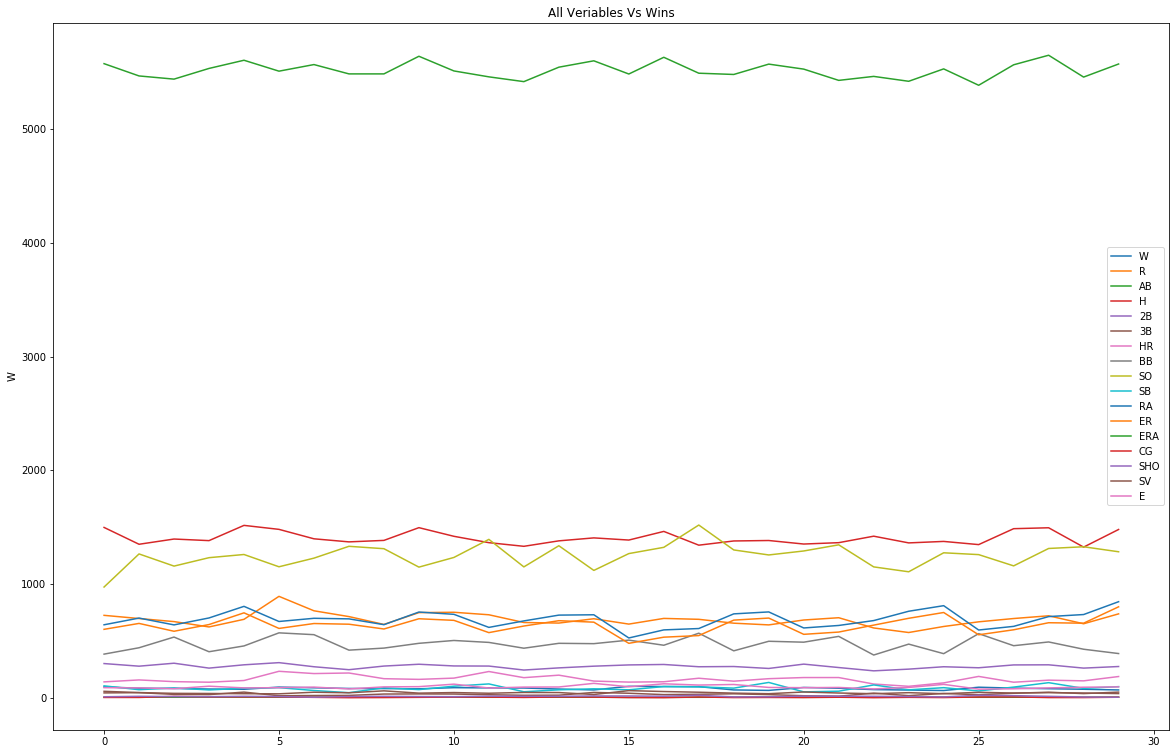

In [21]:
figure2 = baseball[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER',
       'ERA', 'CG', 'SHO', 'SV', 'E']]
figure2.plot(kind ='line',figsize =(20,13))
plt.title("All Veriables Vs Wins")
plt.ylabel("W")
plt.show()

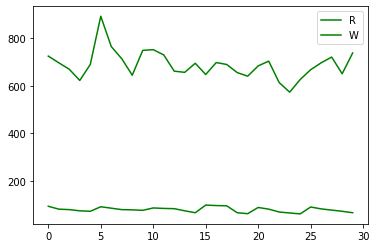

In [22]:
figure_a= baseball[['R', 'W']]
figure_a.plot(kind = 'line', color = 'g')

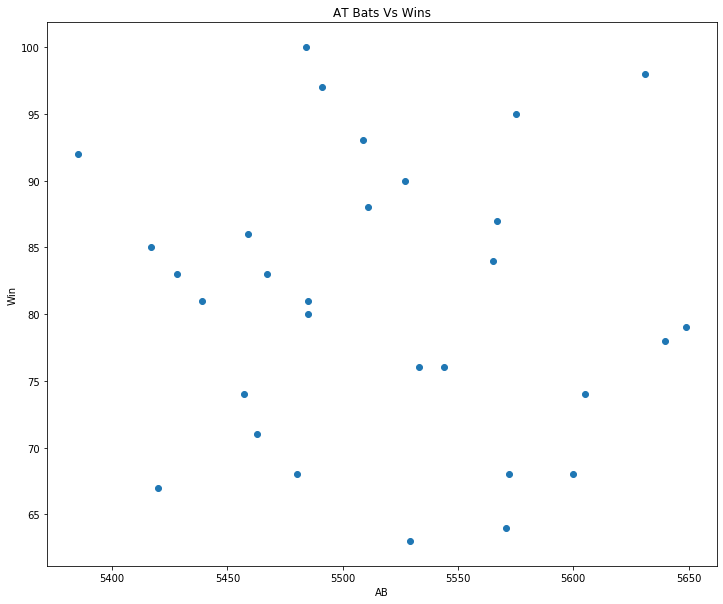

In [23]:
plt.figure(figsize=(12,10))
plt.scatter(baseball['AB'], baseball['W'])
plt.title("AT Bats Vs Wins")
plt.ylabel("Win")
plt.xlabel("AB")
plt.show()

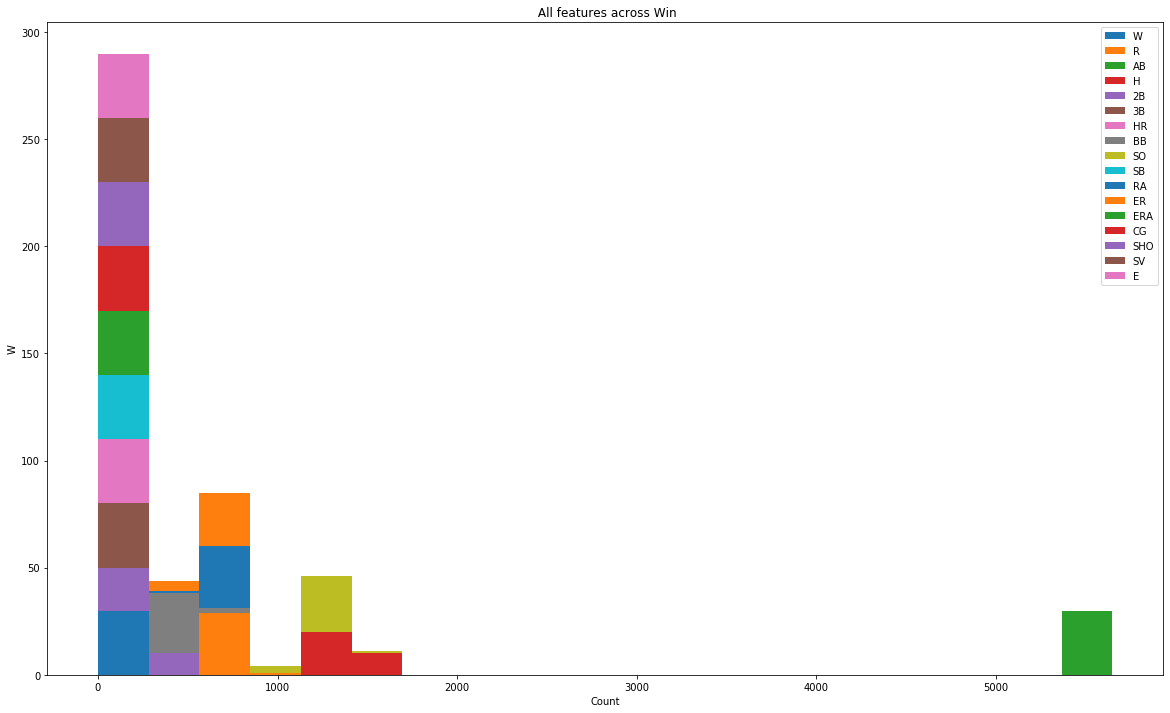

In [24]:
figure3 = baseball[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER', 'ERA', 'CG', 'SHO', 'SV', 'E']]
figure3.plot(kind ='hist',stacked=True, bins=20, figsize =(20,12))
plt.title (" All features across Win")
plt.ylabel("W")
plt.xlabel("Count")
plt.show()

In [1]:
figure4 = baseball[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']]
figure4.plot(kind ='box', figsize =(20,8))
plt.title (" All features across Win")
plt.ylabel("Count")
plt.xlabel("Features")
plt.show()

NameError: name 'baseball' is not defined

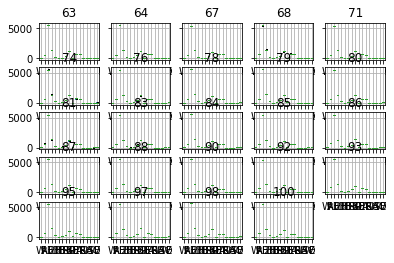

In [26]:
figure5 = baseball.groupby('W').boxplot()

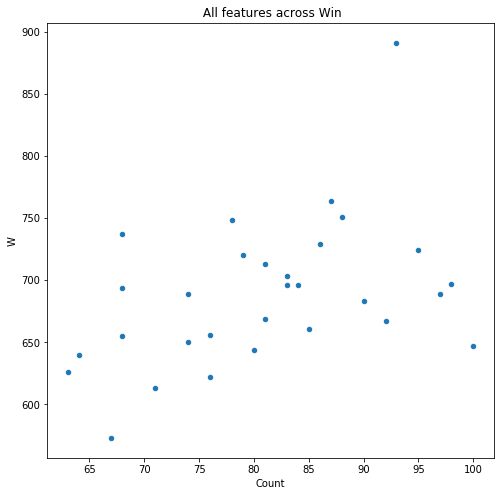

In [27]:
figure4 = baseball[['W', 'R', 'AB', 'H', '2B', '3B', 'HR', 'BB', 'SO', 'SB', 'RA', 'ER','ERA', 'CG', 'SHO', 'SV', 'E']]
figure4.plot(kind ='scatter', x='W', y='R', figsize =(8,8))
plt.title (" All features across Win")
plt.ylabel("W")
plt.xlabel("Count")
plt.show()

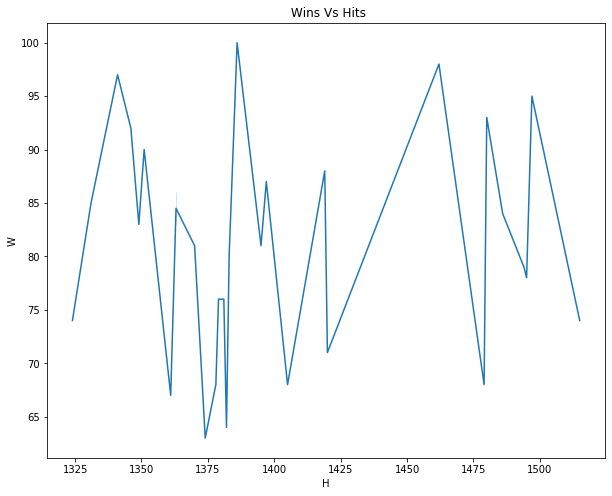

In [28]:
# lets check how wins is changing with respect to hits
plt.figure(figsize=(10,8))
sns.lineplot(x = baseball['H'], y = baseball['W'], data = baseball)
plt.title(" Wins Vs Hits")
plt.show()

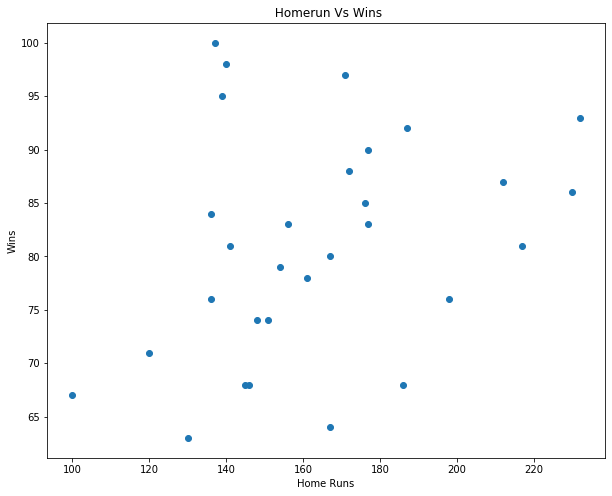

In [29]:
# lets check how wins is changing in respect to homerun
plt.figure(figsize=(10,8))
plt.scatter(baseball['HR'], baseball['W'])
plt.title(" Homerun Vs Wins")
plt.ylabel("Wins")
plt.xlabel("Home Runs")
plt.show()

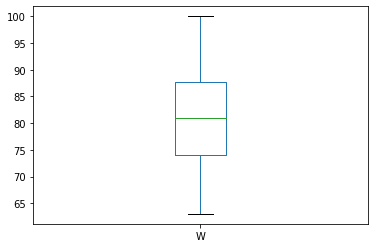

In [30]:
baseball['W'].plot.box()

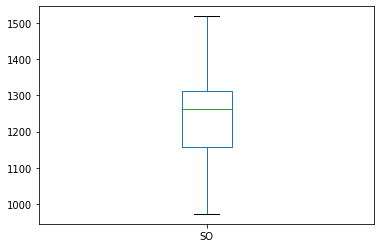

In [31]:
baseball['SO'].plot.box()

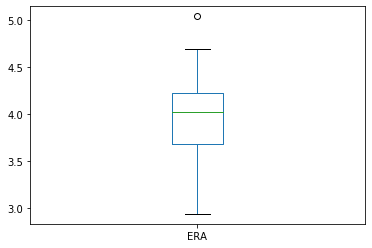

In [32]:
baseball['ERA'].plot.box()

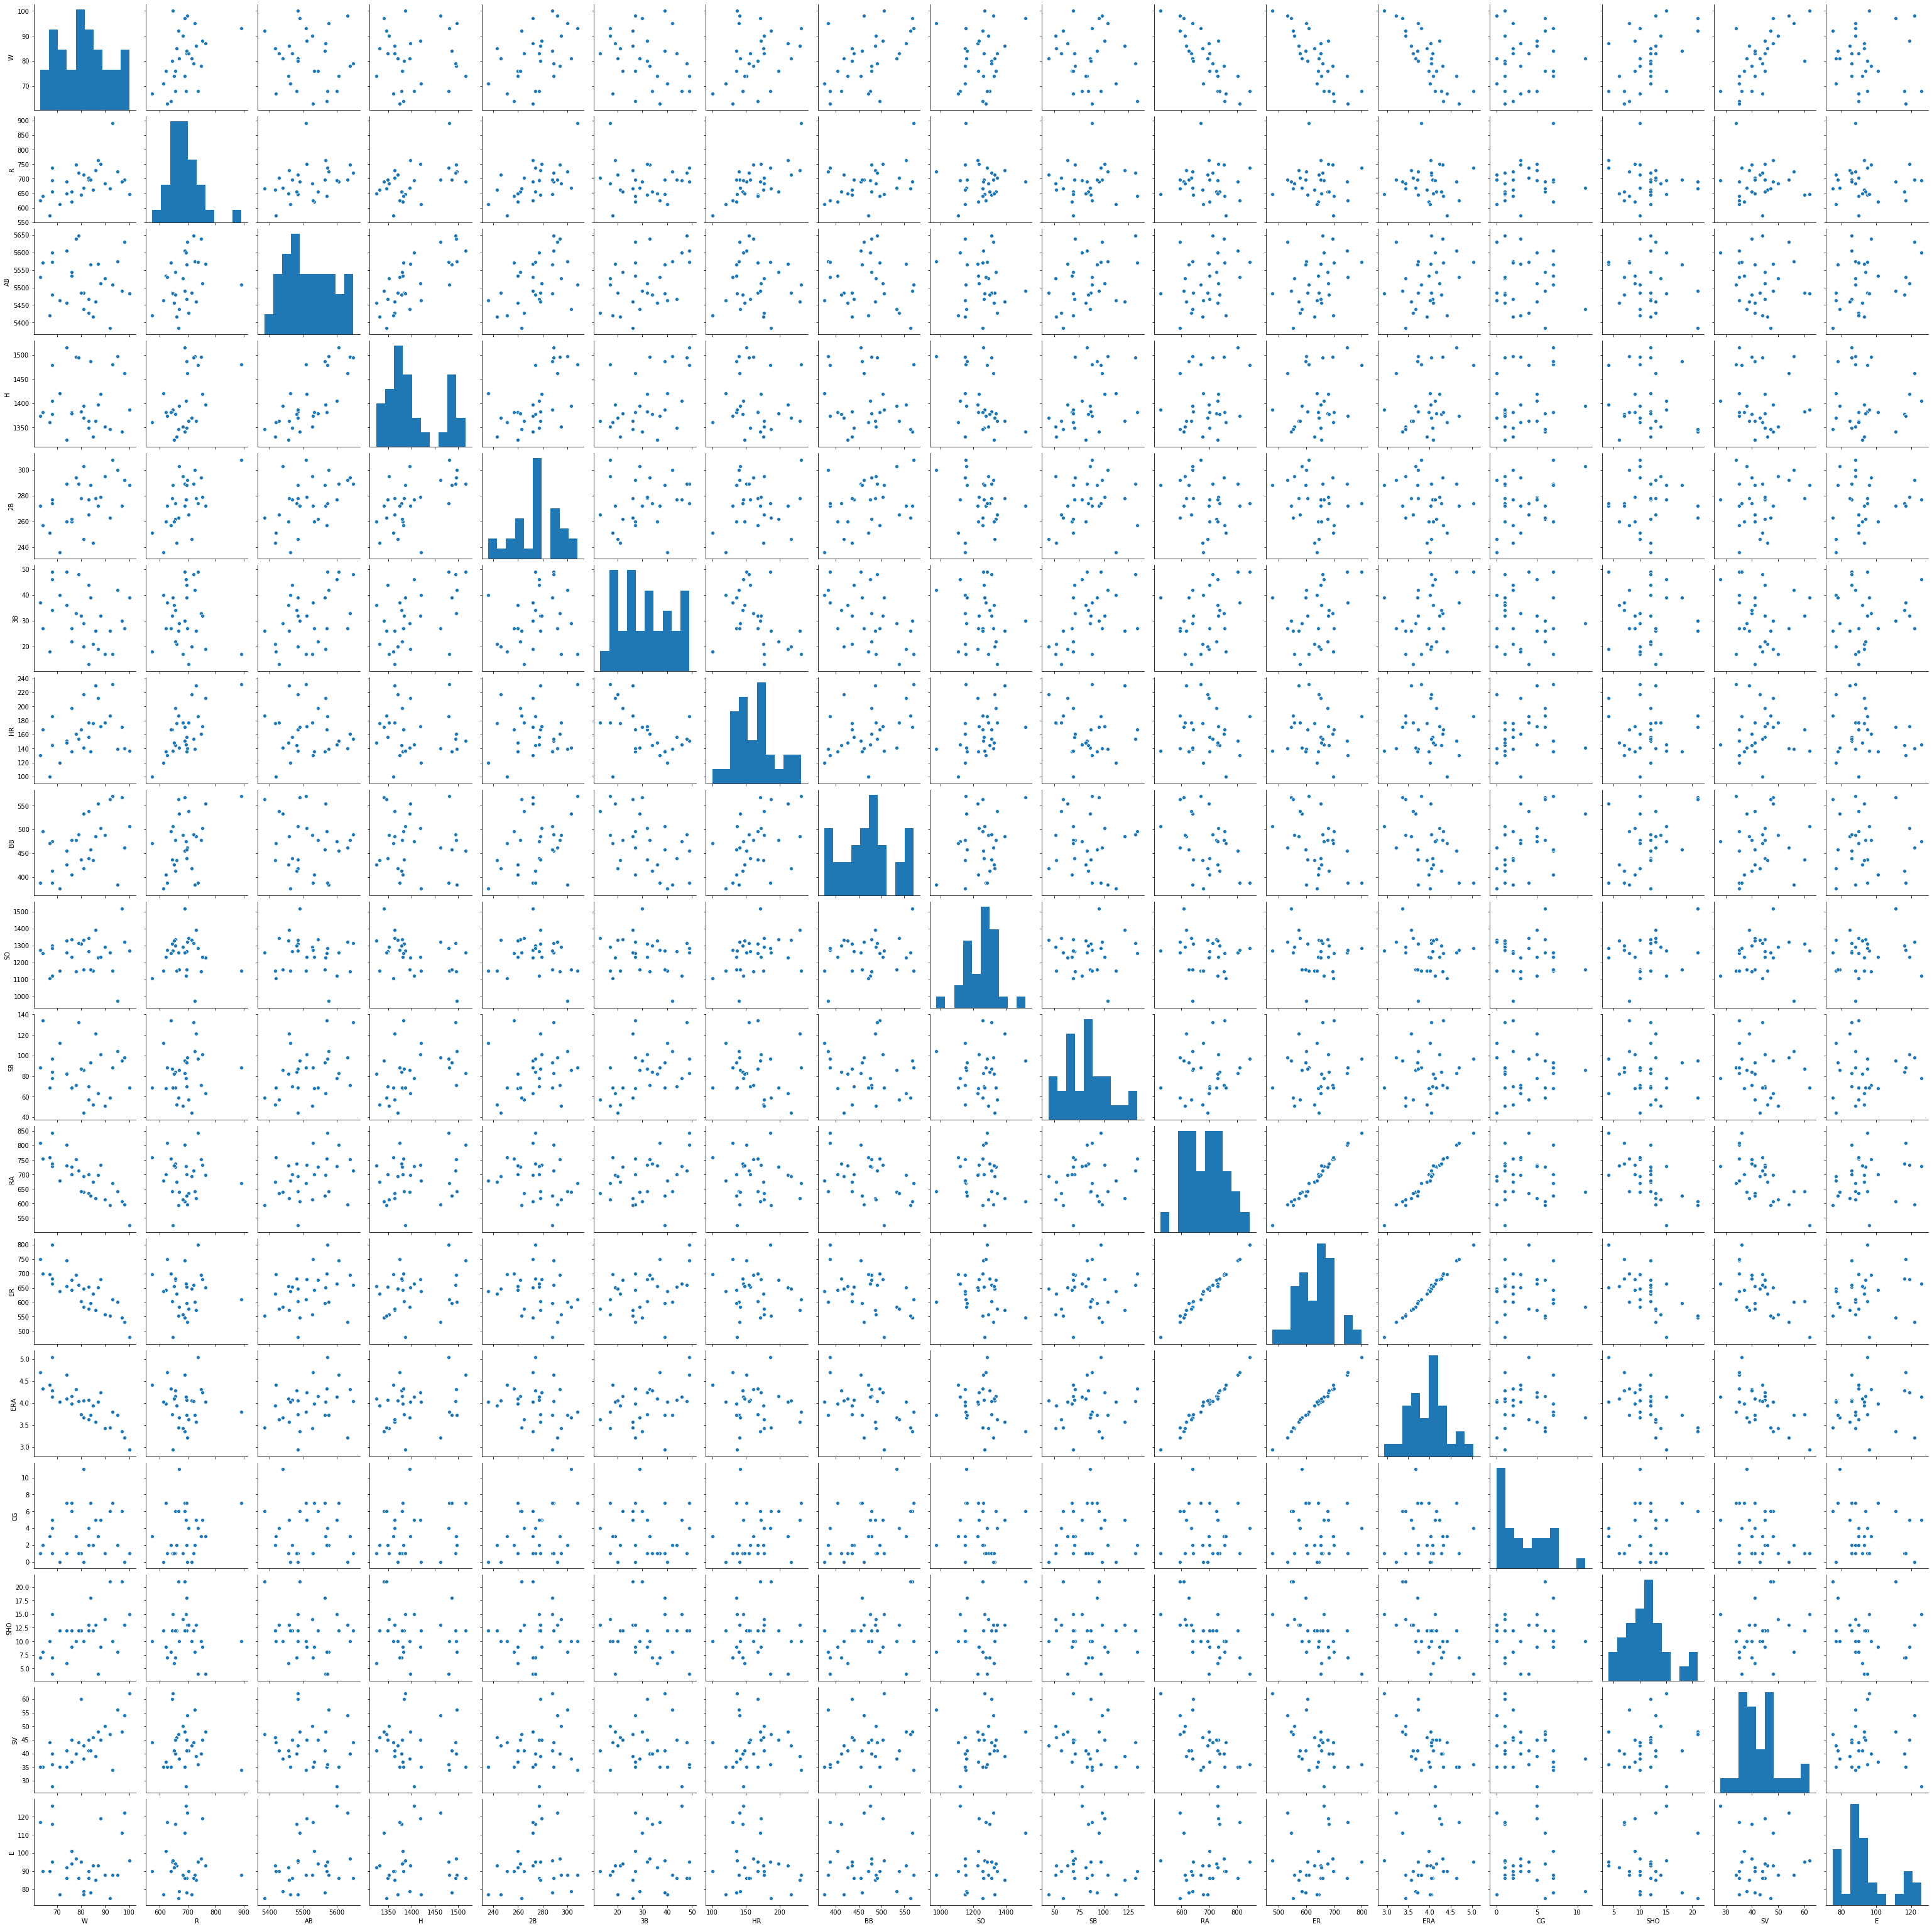

In [33]:
# Bivariate analysis
sns.pairplot(baseball)

# Checking Correlations

In [34]:
dfcor = baseball.corr()
dfcor

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


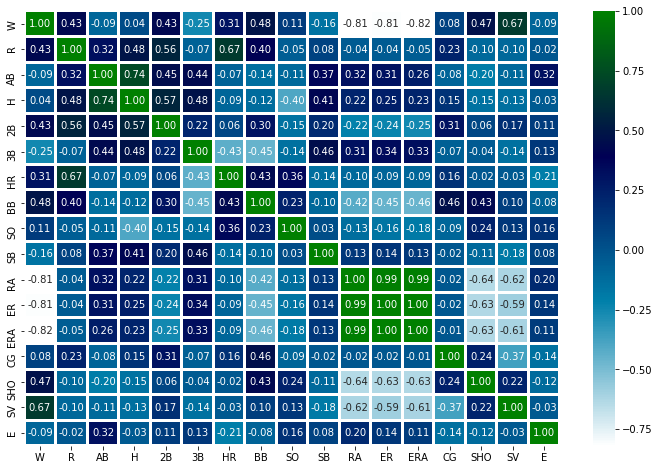

In [35]:
# Visual representation of correlation in heatmap
plt.figure(figsize=(12,8))
sns.heatmap(dfcor,cmap='ocean_r', linewidths=2, fmt=".2f", annot=True)

# Darker color shows positive correlation where as lighter color dipict negative correlation

# Plotting Outliers

In [36]:
# lets find out whether there are any outlier present in the dataset
# importing important libraries

from scipy.stats import zscore
z_score = abs(zscore(baseball))
print(baseball.shape)
df_baseball = baseball.loc[(z_score<3).all(axis=1)]
print(df_baseball.shape)

# outliers have been removed

(30, 17)
(29, 17)


In [37]:
collist = df_baseball.columns.values
ncol = 17
nrows = 10

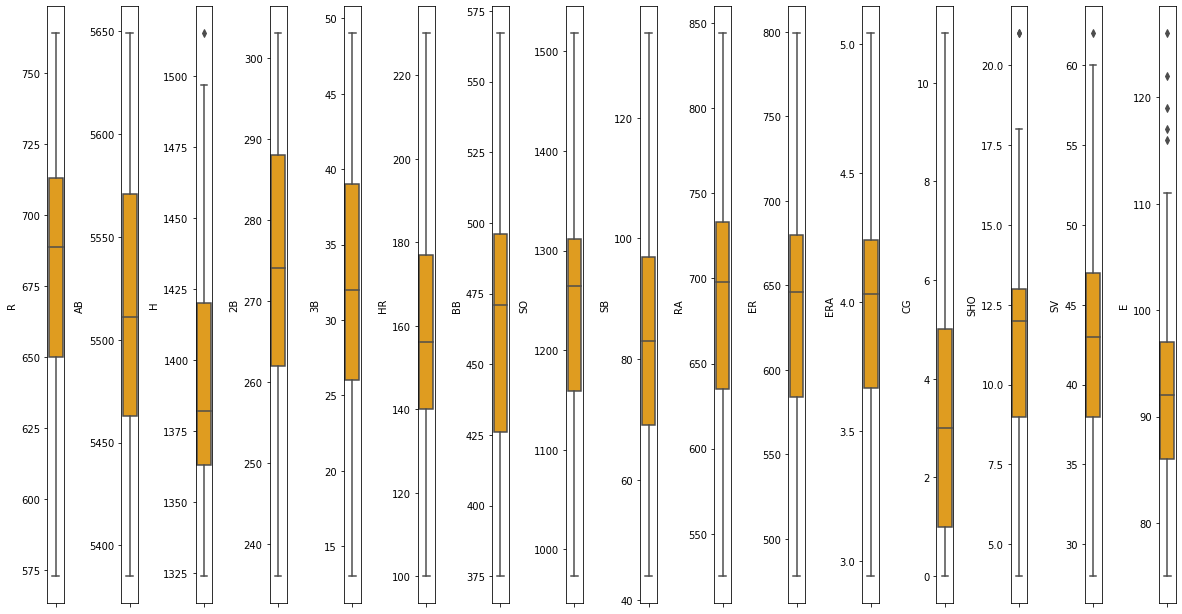

In [38]:
# Graphical representation of data
plt.figure(figsize=(ncol,5*ncol))
for i in range(1, len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.boxplot(df_baseball[collist[i]], color = 'orange', orient ='v')
    plt.tight_layout()

# Checking if skewness is present

In [39]:
# finding snewness if there is any in dataset
df_baseball.skew()

# data shows there is very little positive skewness

W      0.119013
R     -0.215364
AB     0.169573
H      0.783772
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG     0.854980
SHO    0.526943
SV     0.627480
E      0.840271
dtype: float64

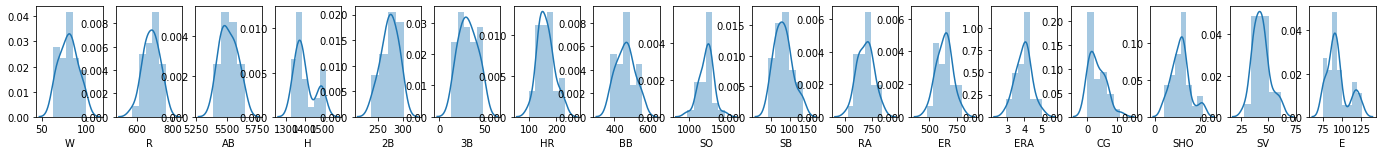

In [40]:
#plt.figure(figure=5*totalcol,5*totalcol)
plt.figure(figsize = (24,24))
for i in range(0,len(collist)):
    plt.subplot(nrows,ncol,i+1)
    sns.distplot(df_baseball[collist[i]])

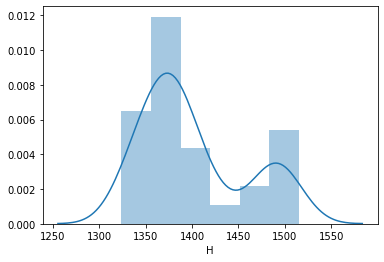

In [41]:
sns.distplot(df_baseball['H'])

# data is right skewed

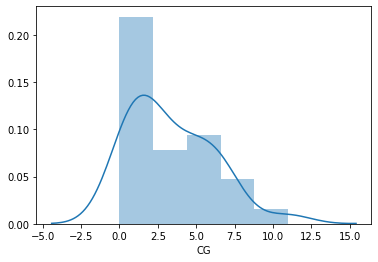

In [42]:
sns.distplot(df_baseball['CG'])
# Data is right skewed

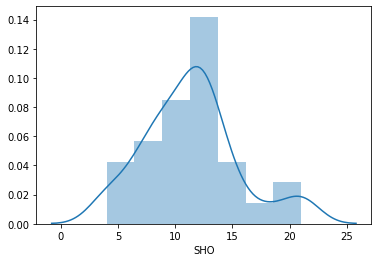

In [43]:
sns.distplot(df_baseball['SHO'])
# right skewed data

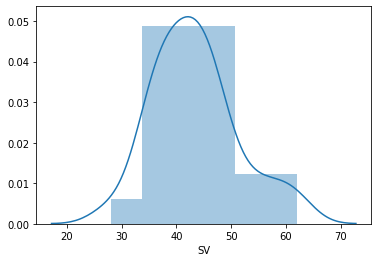

In [44]:
sns.distplot(df_baseball['SV'])
# right skewed data

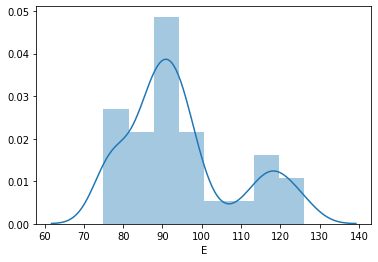

In [45]:
sns.distplot(df_baseball['E'])
# data is right skewed

In [46]:
# Will treat the skewness with log
import numpy as np
for col in df_baseball.columns:
    if df_baseball.skew().loc[col]>0.55:
        df_baseball[col] = np.log1p(df_baseball[col])

In [47]:
df_baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.738455
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [48]:
# skewness is still present in feature 'H', hence treating with syuare root transform

list = ['H']

for i in list:
    df_baseball[i] = np.sqrt(np.sqrt(df_baseball[i]))

In [49]:
df_baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.733688
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [50]:
# # skewness is still present in feature 'H', hence treating with cube root transformation
list = ['H']
for i in list:
    df_baseball[i] = np.cbrt(df_baseball[i])

# no change in 'H' feature skewness

In [51]:
df_baseball.skew()

W      0.119013
R     -0.215364
AB     0.169573
H      0.732627
2B    -0.335304
3B     0.090124
HR     0.450862
BB     0.151193
SO    -0.233815
SB     0.494966
RA     0.018155
ER     0.018461
ERA    0.016693
CG    -0.275681
SHO    0.526943
SV     0.109983
E      0.586101
dtype: float64

In [52]:
# Seperating input and output variable for regression 
df_baseball.shape

(29, 17)

In [53]:
# defining x features
x = df_baseball.iloc[:,1:]
x.head(3)

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,724,5575,1.180327,300,42,139,383,973,104,641,601,3.73,1.098612,8,4.043051,4.488636
1,696,5467,1.178919,277,44,156,439,1264,70,700,653,4.07,1.098612,12,3.828641,4.465908
2,669,5439,1.179374,303,29,141,533,1157,86,640,584,3.67,2.484907,10,3.663562,4.382027


In [54]:
x.shape

(29, 16)

In [55]:
# defining y variable
y = df_baseball.iloc[:,:1]
y.head(3)

,W
0,95
1,83
2,81


In [56]:
y.shape

(29, 1)

In [57]:
# scaling down using standard scaler
# importing library
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[ 0.95939835,  0.83008422,  1.72184018,  1.55653766,  1.01084549,
        -0.76586314, -1.53635899, -2.72762331,  0.9059529 , -0.66451353,
        -0.51114812, -0.51138828, -0.24041455, -0.81326172,  1.55481209,
        -0.43573324],
       [ 0.33114717, -0.70283074, -0.95123658,  0.20117132,  1.20891656,
        -0.18138864, -0.49502051,  0.12189552, -0.58531515,  0.15463823,
         0.23216082,  0.23895226, -0.24041455,  0.15929869,  0.29622875,
        -0.59810993],
       [-0.27466646, -1.10025314, -0.08641082,  1.73332457, -0.2766165 ,
        -0.69710144,  1.25294051, -0.9258657 ,  0.11645805, -0.67839746,
        -0.75415297, -0.64380131,  1.81571095, -0.32698152, -0.67278738,
        -1.19738162],
       [-1.32923093,  0.23395062, -0.34617819, -0.8006212 , -0.47468758,
        -0.8690057 , -1.14585706, -0.20124579, -0.6730368 ,  0.16852216,
         0.08921679,  0.04033271,  1.21433279, -0.57012162, -0.82526317,
         0.53829069],
       [ 0.17408438,  1.25589393,  2

In [58]:
# Data is ready for machine learning

In [59]:
# importing important libraries

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor

from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor

In [60]:
# trying to find our best random_state between 42 to 100 with test_size = 20

max_r_score = 0
for r_state in range(42,101):
    x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = r_state, test_size = 0.20)
    lr = LinearRegression()
    lr.fit(x_train, y_train)
    y_predict = lr.predict(x_test)
    r2_scr = r2_score(y_test, y_predict)
    print("r2_score corresponding to random state: ", r_state," is : ", r2_scr)
    if r2_scr > max_r_score:
        max_r_score = r2_scr
        final_r_state = r_state
    print()
    print()
    print("max r2 score corresponding to ", final_r_state, "is ", max_r_score)


r2_score corresponding to random state:  42  is :  0.5482845580510736


max r2 score corresponding to  42 is  0.5482845580510736
r2_score corresponding to random state:  43  is :  -3.2083679287642974


max r2 score corresponding to  42 is  0.5482845580510736
r2_score corresponding to random state:  44  is :  0.4195777579395412


max r2 score corresponding to  42 is  0.5482845580510736
r2_score corresponding to random state:  45  is :  0.27426497604063915


max r2 score corresponding to  42 is  0.5482845580510736
r2_score corresponding to random state:  46  is :  0.7698351796685419


max r2 score corresponding to  46 is  0.7698351796685419
r2_score corresponding to random state:  47  is :  -0.4673126907356555


max r2 score corresponding to  46 is  0.7698351796685419
r2_score corresponding to random state:  48  is :  -0.058814413735527094


max r2 score corresponding to  46 is  0.7698351796685419
r2_score corresponding to random state:  49  is :  -0.4152916928381454


max r2 score corre

In [61]:
# since maximum r2 score is comming around 0.85 with random state 73.Hence using this detail to check other models

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state = 73, test_size = 0.20)

In [62]:
x_train.shape

(23, 16)

In [63]:
y_train.shape

(23, 1)

In [64]:
x_test.shape

(6, 16)

In [65]:
y_test.shape

(6, 1)

In [66]:
# finding best paparmeters for each models using gridSearchCV

In [67]:
svr=SVR()
parameters = {'kernel':('linear','poly','rbf'), 'C':[1,10]}
svgs = GridSearchCV(svr, parameters, cv = 5)
svgs.fit(x_train, y_train)
svgs.best_params_

{'C': 10, 'kernel': 'poly'}

In [68]:
dtr = DecisionTreeRegressor()
parameters = {'criterion':('mse','friendman_mse', 'mae')}
dtrgs = GridSearchCV(dtr, parameters, cv = 5)
dtrgs.fit(x_train, y_train)
dtrgs.best_params_

{'criterion': 'mse'}

In [69]:
knn = KNeighborsRegressor()
parameters = {'n_neighbors':range(1,18)}
knngs = GridSearchCV(knn, parameters, cv = 5)
knngs.fit(x_train, y_train)
knngs.best_params_

{'n_neighbors': 7}

In [70]:
rfr = RandomForestRegressor()
parameters = {'n_estimators':[100,199]}
rfrgs = GridSearchCV(rfr, parameters, cv = 5)
rfrgs.fit(x_train, y_train)
rfrgs.best_params_

{'n_estimators': 199}

In [71]:
lsor = Lasso()
parameters = {'alpha':[0.001,0.01,0.1,1]}
lsorgs = GridSearchCV(lsor, parameters, cv = 5)
lsorgs.fit(x_train, y_train)
lsorgs.best_params_

{'alpha': 1}

In [72]:
gbr = GradientBoostingRegressor()
parameters = {'learning_rate':[0.001,0.01,0.1,1], 'n_estimators':[10,100,500,1000]}
gbrgs = GridSearchCV(gbr, parameters, cv = 5)
gbrgs.fit(x_train, y_train)
gbrgs.best_params_

{'learning_rate': 0.1, 'n_estimators': 100}

In [81]:
lr = LinearRegression()
svr = SVR(C=10, kernel = 'poly')
dtr = DecisionTreeRegressor(criterion = 'mse')
knn = KNeighborsRegressor(n_neighbors = 7)
rfr = RandomForestRegressor(n_estimators = 199)
lsor = Lasso(alpha = 1)
bgr = GradientBoostingRegressor(learning_rate = 0.1 , n_estimators = 100)

In [82]:
models = []
models.append(('LinearRegression' , lr))
models.append(('SVR' , svr))
models.append(('DecisionTreeRegressor' , dtr))
models.append(('KNeighborsRegressor' , knn))
models.append(('RandomForestRegressor' , rfr))
models.append(('Lasso', lsor))
models.append(('GradientBoostingRegressor' , bgr))

In [75]:
# Testing all required models with the best parameters calculated

Model = []
score = []
rmse = []
mae = []
mse = []
cvs = []
std = []

for name,model in models:
    print ('**********************', name ,'*******************')
    print("\n")
    Model.append(name)
    model.fit(x_train, y_train)
    print(model)
    predict = model.predict(x_test)
    print("\n")
    rscore = r2_score(y_test, predict)
    print("r2 Score =" ,rscore)
    score.append(rscore*100)
    print("\n")
    RMS = np.sqrt(mean_squared_error(y_test, predict))
    print("RMSE =", RMS)
    rmse.append(RMS*100)
    print("\n")
    MA = mean_absolute_error(y_test, predict)
    print("MAE =", MA)
    mae.append(MA*100)
    print("\n")
    MS = mean_squared_error(y_test, predict)
    print("MSE =", MS)
    mse.append(MS*100)
    print("\n")
    cvscore = cross_val_score(model, x, y, cv = 10).mean()
    print("Cross_ Val_Score =", cvscore)
    cvs.append(cvscore*100)
    print("\n")
    stdscore = cross_val_score(model, x, y, cv = 10).std()
    print("Standard Devaition =", stdscore)
    std.append(stdscore*100)
    print("\n\n") 

********************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


r2 Score = 0.8503129059680261


RMSE = 4.460483110801997


MAE = 3.712865931673902


MSE = 19.895909581749862


Cross_ Val_Score = -2.432176239172625


Standard Devaition = 5.4628335593815365



********************** SVR *******************


SVR(C=10, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='poly', max_iter=-1, shrinking=True, tol=0.001, verbose=False)


r2 Score = 0.4163970259885186


RMSE = 8.80741516918326


MAE = 7.983685399409379


MSE = 77.5705619623594


Cross_ Val_Score = -3.5495783993271273


Standard Devaition = 8.860402402019696



********************** DecisionTreeRegressor *******************


DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=No

In [83]:
import pandas as pd
result = pd.DataFrame({'Model': Model, 'r2_score': score, 'Root_mean_square': rmse,'Mean_absolute_error': mae, 'Mean_square_error': mse, 'Cross_val_score_mean':cvs, 'Cross_val_score_Std': std})
result

,Model,r2_score,Root_mean_square,Mean_absolute_error,Mean_square_error,Cross_val_score_mean,Cross_val_score_Std
0,LinearRegression,85.031291,446.048311,371.286593,1989.590958,-243.217624,546.283356
1,SVR,41.639703,880.741517,798.368540,7757.056196,-354.957840,886.040240
2,DecisionTreeRegressor,49.843260,816.496581,600.000000,6666.666667,-1907.820470,3206.625909
3,KNeighborsRegressor,57.402597,752.456295,700.000000,5661.904762,-469.456521,1308.447847
4,RandomForestRegressor,58.943812,738.718593,630.318258,5457.051590,-686.025366,1518.831893
5,Lasso,89.200952,378.863234,327.908109,1435.373504,-273.008880,690.032319
6,GradientBoostingRegressor,62.346698,707.442677,635.580623,5004.751419,-1145.636716,2180.689797


In [77]:
# The above analysis shows that Lasso is giving the best result

In [78]:
from sklearn.externals import joblib
joblib.dump(lsor, 'Baseball_Lasso.cvs')

['Baseball_Lasso.cvs']

In [84]:
model=joblib.load('Baseball_lasso.cvs')

In [85]:
model.predict(x_test)

array([89.82801796, 77.89466481, 73.8316674 , 65.34280746, 89.5803713 ,
       80.98626389])